# NBA - Hall Of Fame prediction

### Authors:
* **Ilan Simchon**
* **Kfir Zilbernagel**

### <U> Basic information about NBA and Hall Of Fame
**NBA** The National Basketball Association (NBA) is a professional basketball league in North America. The league is composed of 30 teams (29 in the United States and 1 in Canada) and is one of the four major professional sports leagues in the United States and Canada. It is the premier men's professional basketball league in the world.

**Hall Of Fame** The Naismith Memorial Basketball Hall of Fame is located in the home of basketball in Springfield, Massachusetts. It is named after the man who invented basketball – James Naismith. The Hall of Fame was created in 1959, and opened to the public only in 1968. This includes coaches, players, and figures who have contributed to the development of basketball. The Basketball Hall of Fame is designed to immortalize the brightest basketball stars and the best moments of the game. It remains the world’s best sports museum.

**Selection process** The Hall of Fame is eligible to select individuals from around the world whose contribution to basketball has been significant, the criteria for selecting basketball players must be 4 years after full retirement from professional basketball, coaches or referees must be 4 years after retirement or have at least 25 years seniority in high school, college or professional basketball. In addition, other personalities such as reporters, sports commentators, and prominent broadcasters are eligible to be elected, for whom there is no defined quantitative criterion.

*** At the project, We only deal with male players** 

The selection is made by subcommittees:

consisting of nine experts can recommend up to 10 candidates each year if they have at least seven supports

Following the recommendations of the subcommittees, the candidates are examined in 4 "honorary committees", each honorary committee is composed of 24 professionals, including members of the Hall of Fame, media people, basketball practitioners, and other donors. All honorary committees have 12 common permanent members and the rest are rotated according to the committee's expertise. In order to be elected to the Hall of Fame, the support of at least 18 members of the Honor Committee is required.
 
(source : https://en.wikipedia.org/wiki/Naismith_Memorial_Basketball_Hall_of_Fame)
    
### <u>Experts
    
We take advice and recommends by experts of NBA
* **Sharon Davidovitch** Owner of "עושים NBA" podcast.
* **Eran Soroka** NBA reporter at the Israeli sport channel "Sport 5" and owner of "עושים NBA" podcast.
* **Roi Weinberg** NBA reporter at the Israeli sport channel "Sport 5".

We will mention them in the relevant parts.

### <u> Data source 

The data was collected by web-scraping from the website: https://en.hispanosnba.com/
    
### <u> Task definition

Our task is to classify the players for those who have been chosen for the Hall of Fame and those who have not by parameters
of career stats and awards that each player achieved in his career.



    
    

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')



## <u>Part 1: Data cleaning and preparing for work 

##### Loading the dataset

In [74]:
hof = pd.read_csv('C:\\Users\\Shlomit\\Desktop\\NBA-Hall-Of-Fame-Project\\hall-of-fame-DF.csv')
hof

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,S.T,T.T,F.T.D,S.T.D,Seasons,Playoffs,Finals,titles,Retired,H.O.F
0,Alaa Abdelnaby,256,53,12.5,50.2,0.0,70.1,3.3,0.3,0.3,...,NaN,NaN,NaN,NaN,5.0,3.0,1.0,0.0,1.0,0.0
1,Zaid Abdul-Aziz,505,0,21.8,42.8,--,72.8,8.0,1.2,0.6,...,NaN,NaN,NaN,NaN,10.0,3.0,0.0,0.0,1.0,0.0
2,Kareem Abdul-Jabbar,1560,625,36.8,55.9,5.6,72.1,11.2,3.6,0.9,...,5.0,0.0,5.0,6.0,20.0,18.0,10.0,6.0,1.0,1.0
3,Mahmoud Abdul-Rauf,586,336,26.7,44.2,35.4,90.5,1.9,3.5,0.8,...,NaN,NaN,NaN,NaN,9.0,2.0,0.0,0.0,1.0,0.0
4,Tariq Abdul-Wahad,236,145,20.4,41.7,23.7,70.3,3.3,1.1,0.8,...,NaN,NaN,NaN,NaN,6.0,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,Ante Zizic,113,27,13.4,58.1,0.0,71.1,3.9,0.6,0.2,...,NaN,NaN,NaN,NaN,3.0,1.0,1.0,0.0,0.0,0.0
4701,Jim Zoet,7,0,4.3,20.0,0.0,0.0,1.1,0.1,0.1,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0
4702,Bill Zopf,53,0,7.5,36.3,--,55.6,0.9,1.4,--,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0
4703,Ivica Zubac,336,203,18.6,59.7,10.0,75.6,6.3,1.1,0.3,...,NaN,NaN,NaN,NaN,5.0,3.0,0.0,0.0,0.0,0.0


##### Change columns names

In [75]:
hof.columns

Index(['PLAYER_NAME', 'GP', 'GS', 'MIN', 'FG', '3P', 'FT', 'REB', 'AST', 'STL',
       'TO', 'BLK', 'PF', 'PTS', 'EFF', 'A.S.G', 'P.O.M', 'F.T', 'S.T', 'T.T',
       'F.T.D', 'S.T.D', 'Seasons', 'Playoffs', 'Finals', 'titles', 'Retired',
       'H.O.F'],
      dtype='object')

In [76]:
hof = hof.rename({'A.S.G':'ASG','P.O.M':'POM','F.T':'T1','S.T':'T2','T.T':'T3','F.T.D':'DT1',
'S.T.D':'DT2','titles':'Titles', 'H.O.F':'HOF'},axis=1)
hof.columns

Index(['PLAYER_NAME', 'GP', 'GS', 'MIN', 'FG', '3P', 'FT', 'REB', 'AST', 'STL',
       'TO', 'BLK', 'PF', 'PTS', 'EFF', 'ASG', 'POM', 'T1', 'T2', 'T3', 'DT1',
       'DT2', 'Seasons', 'Playoffs', 'Finals', 'Titles', 'Retired', 'HOF'],
      dtype='object')

### <u> Columns explanation:
* **PLAYER_NAME**: Player name                                           
* **GP:** Games played                                                    
* **GS:** Games start                                               
* **MIN:** Minutes per game                                             
* **FG:** field goals percentage                                         
* **3P:** 3P percentage
* **FT:** Free throw percentage
* **REB:** Rebound per game
* **STL:** Steals per game
* **TO:** Turnovers per game
* **BLK:** Blocks per game
* **PF:** Personal fouls per game
* **PTS:** Points per game
* **EFF:** Efficiency
* **ASG:** All star games
* **POM:** Player of the month
* **T1:**  All-NBA first Team
* **T2:**  All-NBA second Team
* **T3:**  All-NBA third Team
* **DT1:** All-NBA-Defensive first Team
* **DT2:** All-NBA-Defensive second Team
* **Seasons:** Seasons played
* **Playoffs:** Reached the playoffs
* **Finals:** Reached the finals
* **Titles:** Won championships
* **Retired:** If Retired value is: 1, else value is: 0
* **HOF:** If selected to Hall Of Fame value is: 1, else value is: 0

##### Convert columns types to float from object

In [77]:
hof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PLAYER_NAME  4705 non-null   object 
 1   GP           4705 non-null   int64  
 2   GS           4705 non-null   int64  
 3   MIN          4705 non-null   object 
 4   FG           4705 non-null   float64
 5   3P           4705 non-null   object 
 6   FT           4705 non-null   float64
 7   REB          4705 non-null   object 
 8   AST          4705 non-null   float64
 9   STL          4705 non-null   object 
 10  TO           4705 non-null   object 
 11  BLK          4705 non-null   object 
 12  PF           4705 non-null   float64
 13  PTS          4705 non-null   float64
 14  EFF          4705 non-null   float64
 15  ASG          445 non-null    float64
 16  POM          114 non-null    float64
 17  T1           250 non-null    float64
 18  T2           250 non-null    float64
 19  T3    

In [78]:
for i in range(0 , len(hof['3P'])):
    try:
        hof.loc[i,'3P'] = float(hof.loc[i,'3P'])
    except:
        hof.loc[i,'3P'] = None

for i in range(0 , len(hof['MIN'])):
    try:
        hof.loc[i,'MIN'] = float(hof.loc[i,'MIN'])
    except:
        hof.loc[i,'MIN'] = None
        
for i in range(0 , len(hof['STL'])):
    try:
        hof.loc[i,'STL'] = float(hof.loc[i,'STL'])
    except:
        hof.loc[i,'STL'] = None
        
for i in range(0 , len(hof['TO'])):
    try:
        hof.loc[i,'TO'] = float(hof.loc[i,'TO'])
    except:
        hof.loc[i,'TO'] = None
        
for i in range(0 , len(hof['BLK'])):
    try:
        hof.loc[i,'BLK'] = float(hof.loc[i,'BLK'])
    except:
        hof.loc[i,'BLK'] = None

for i in range(0 , len(hof['REB'])):
    try:
        hof.loc[i,'REB'] = float(hof.loc[i,'REB'])
    except:
        hof.loc[i,'REB'] = None
        


In [79]:
hof.PLAYER_NAME = hof.PLAYER_NAME.astype('string')
hof.REB=hof.REB.astype("float")  
hof.MIN=hof.MIN.astype("float")       
hof['3P']=hof['3P'].astype("float")       
hof.STL=hof.STL.astype("float")       
hof.TO=hof.TO.astype("float")  
hof.BLK=hof.BLK.astype("float") 
hof.HOF=hof.HOF.astype("int")

##### Replace null to 0 and convert to int at not avergaing columns
For better visualization

In [80]:
hof.ASG=hof.ASG.fillna(0)
hof.ASG=hof.ASG.astype("int")

hof.POM=hof.POM.fillna(0)
hof.POM=hof.POM.astype("int")

hof['T1']=hof['T1'].fillna(0)
hof['T1']=hof['T1'].astype("int")

hof['T2']=hof['T2'].fillna(0)
hof['T2']=hof['T2'].astype("int")

hof['T3']=hof['T3'].fillna(0)
hof['T3']=hof['T3'].astype("int")

hof['DT1']=hof['DT1'].fillna(0)
hof['DT1']=hof['DT1'].astype("int")

hof['DT2']=hof['DT2'].fillna(0)
hof['DT2']=hof['DT2'].astype('int')

hof.Seasons=hof.Seasons.fillna(0)
hof.Seasons=hof.Seasons.astype("int")

hof.Playoffs=hof.Playoffs.fillna(0)
hof.Playoffs=hof.Playoffs.astype("int")

hof.Finals=hof.Finals.fillna(0)
hof.Finals=hof.Finals.astype("int")

hof.Titles=hof.Titles.fillna(0)
hof.Titles=hof.Titles.astype("int")

hof.Retired=hof.Retired.fillna(0)
hof.Retired=hof.Retired.astype("int")



In [81]:
hof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PLAYER_NAME  4705 non-null   string 
 1   GP           4705 non-null   int64  
 2   GS           4705 non-null   int64  
 3   MIN          4361 non-null   float64
 4   FG           4705 non-null   float64
 5   3P           3420 non-null   float64
 6   FT           4705 non-null   float64
 7   REB          4413 non-null   float64
 8   AST          4705 non-null   float64
 9   STL          3724 non-null   float64
 10  TO           3522 non-null   float64
 11  BLK          3724 non-null   float64
 12  PF           4705 non-null   float64
 13  PTS          4705 non-null   float64
 14  EFF          4705 non-null   float64
 15  ASG          4705 non-null   int32  
 16  POM          4705 non-null   int32  
 17  T1           4705 non-null   int32  
 18  T2           4705 non-null   int32  
 19  T3    

##### Remove active players
Active players can't be selected to HOF

In [82]:
active_players=hof[hof['Retired'] == 0]
hof = hof[hof['Retired'] == 1]
hof = hof.drop(['Retired'] , axis=1)
hof

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,T1,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,HOF
0,Alaa Abdelnaby,256,53,12.5,50.2,0.0,70.1,3.3,0.3,0.3,...,0,0,0,0,0,5,3,1,0,0
1,Zaid Abdul-Aziz,505,0,21.8,42.8,NaN,72.8,8.0,1.2,0.6,...,0,0,0,0,0,10,3,0,0,0
2,Kareem Abdul-Jabbar,1560,625,36.8,55.9,5.6,72.1,11.2,3.6,0.9,...,10,5,0,5,6,20,18,10,6,1
3,Mahmoud Abdul-Rauf,586,336,26.7,44.2,35.4,90.5,1.9,3.5,0.8,...,0,0,0,0,0,9,2,0,0,0
4,Tariq Abdul-Wahad,236,145,20.4,41.7,23.7,70.3,3.3,1.1,0.8,...,0,0,0,0,0,6,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4696,Jiri Zidek,135,23,9.8,40.8,25.0,78.3,2.1,0.2,0.1,...,0,0,0,0,0,3,0,0,0,0
4697,Derrick Zimmerman,2,0,16.0,66.7,0.0,0.0,2.0,3.5,0.0,...,0,0,0,0,0,1,0,0,0,0
4701,Jim Zoet,7,0,4.3,20.0,0.0,0.0,1.1,0.1,0.1,...,0,0,0,0,0,1,0,0,0,0
4702,Bill Zopf,53,0,7.5,36.3,NaN,55.6,0.9,1.4,NaN,...,0,0,0,0,0,1,0,0,0,0


##### Remove players with the potential to be selected to HOF and retired less than four years ago
According to the experts that are the players with potential.
Is very important to remove them because they have very good stats but they have not had a chance to be selected.
This will could cause the model to get incorrect conclusions.

In [83]:
data_with_index = hof.set_index("PLAYER_NAME")
data_with_index = data_with_index.drop(['Dirk Nowitzki','Dwyane Wade','Vince Carter','Pau Gasol'
                                        ,'Tony Parker',"Amar'e Stoudemire",'Manu Ginóbili'])


##### Remove ABA HOF
According to the experts that are the players that chosen to HOf basic on their ABA preformance and not NBA preformanece.

In [84]:
data_with_index = data_with_index.drop(['Mel Daniels' , 'Buddy Jeannette' , 'Bobby Jones'])

In [85]:
hof=data_with_index.reset_index()

hof

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,T1,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,HOF
0,Alaa Abdelnaby,256,53,12.5,50.2,0.0,70.1,3.3,0.3,0.3,...,0,0,0,0,0,5,3,1,0,0
1,Zaid Abdul-Aziz,505,0,21.8,42.8,NaN,72.8,8.0,1.2,0.6,...,0,0,0,0,0,10,3,0,0,0
2,Kareem Abdul-Jabbar,1560,625,36.8,55.9,5.6,72.1,11.2,3.6,0.9,...,10,5,0,5,6,20,18,10,6,1
3,Mahmoud Abdul-Rauf,586,336,26.7,44.2,35.4,90.5,1.9,3.5,0.8,...,0,0,0,0,0,9,2,0,0,0
4,Tariq Abdul-Wahad,236,145,20.4,41.7,23.7,70.3,3.3,1.1,0.8,...,0,0,0,0,0,6,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3459,Jiri Zidek,135,23,9.8,40.8,25.0,78.3,2.1,0.2,0.1,...,0,0,0,0,0,3,0,0,0,0
3460,Derrick Zimmerman,2,0,16.0,66.7,0.0,0.0,2.0,3.5,0.0,...,0,0,0,0,0,1,0,0,0,0
3461,Jim Zoet,7,0,4.3,20.0,0.0,0.0,1.1,0.1,0.1,...,0,0,0,0,0,1,0,0,0,0
3462,Bill Zopf,53,0,7.5,36.3,NaN,55.6,0.9,1.4,NaN,...,0,0,0,0,0,1,0,0,0,0


#### <U> Dealing with missing values
     


###### Because we have a lot of data, and Beacuse we doesn't have HOF we will remove the rows when REB is null.

In [86]:
hof_copy=hof.copy()
hof_copy

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,T1,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,HOF
0,Alaa Abdelnaby,256,53,12.5,50.2,0.0,70.1,3.3,0.3,0.3,...,0,0,0,0,0,5,3,1,0,0
1,Zaid Abdul-Aziz,505,0,21.8,42.8,NaN,72.8,8.0,1.2,0.6,...,0,0,0,0,0,10,3,0,0,0
2,Kareem Abdul-Jabbar,1560,625,36.8,55.9,5.6,72.1,11.2,3.6,0.9,...,10,5,0,5,6,20,18,10,6,1
3,Mahmoud Abdul-Rauf,586,336,26.7,44.2,35.4,90.5,1.9,3.5,0.8,...,0,0,0,0,0,9,2,0,0,0
4,Tariq Abdul-Wahad,236,145,20.4,41.7,23.7,70.3,3.3,1.1,0.8,...,0,0,0,0,0,6,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3459,Jiri Zidek,135,23,9.8,40.8,25.0,78.3,2.1,0.2,0.1,...,0,0,0,0,0,3,0,0,0,0
3460,Derrick Zimmerman,2,0,16.0,66.7,0.0,0.0,2.0,3.5,0.0,...,0,0,0,0,0,1,0,0,0,0
3461,Jim Zoet,7,0,4.3,20.0,0.0,0.0,1.1,0.1,0.1,...,0,0,0,0,0,1,0,0,0,0
3462,Bill Zopf,53,0,7.5,36.3,NaN,55.6,0.9,1.4,NaN,...,0,0,0,0,0,1,0,0,0,0


# Semster B Improvement

#### We will improve our data cleaning process
In a project in its previous version, we decided to download the players that we were missing the information on the rebounds since we did not find a connection between other data and did not want to enter information that is not close to being accurate. Now that we have added the "position" of the player, with the help of the groupby function we can split the information about each position and thus get a better angle to the missing values. So we decided to fill the position of the rebounds according to the position and thus saved 291 examples! Which are almost 10% more information and so our model will have more examples to learn from them.

#### Position explanaition:
**1** - Point guard<br>
**2** - Shooting guard<br>
**3** - Small forward<br>
**4** - Forward<br>
**5** - Center

##### Craete data frame after scrapping the "Position" of the each player

In [87]:
hof_pos=pd.read_csv('C:\\Users\\Shlomit\\Desktop\\HOF-DF-position.csv')
hof_pos.drop(['Unnamed: 0'], axis=1, inplace=True)
hof_pos

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,HOF,position
0,Alaa Abdelnaby,256,53,12.5,50.2,0.0,70.1,3.3,0.3,0.300000,...,0,0,0,0,5,3,1,0,0,4
1,Tariq Abdul-Wahad,236,145,20.4,41.7,23.7,70.3,3.3,1.1,0.800000,...,0,0,0,0,6,2,0,0,0,2
2,Tom Abernethy,319,0,17.0,49.2,0.0,74.7,3.2,1.2,0.600000,...,0,0,0,0,5,2,0,0,0,3
3,Forest Able,1,0,1.0,0.0,NaN,0.0,1.0,1.0,0.476032,...,0,0,0,0,1,0,0,0,0,2
4,Don Ackerman,28,0,7.9,22.2,NaN,53.6,0.5,0.8,0.476032,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,Wes Unseld,984,0,36.4,50.9,50.0,63.3,14.0,3.9,1.100000,...,0,0,0,0,13,12,4,1,1,5
3227,Bill Walton,468,117,28.3,52.1,0.0,66.0,10.5,3.4,0.800000,...,1,0,2,0,10,4,3,2,1,5
3228,Chris Webber,831,827,37.1,47.9,29.9,64.9,9.8,4.2,1.400000,...,3,1,0,0,15,10,0,0,1,4
3229,Larry Bird,897,870,38.4,49.6,37.6,88.6,10.0,6.3,1.700000,...,1,0,0,3,13,12,5,3,1,3


In [88]:
hof_position=pd.read_csv('C:\\Users\\Shlomit\\Desktop\\HOF-DF-pos.csv')
hof_position.drop(['Unnamed: 0'], axis=1, inplace=True)
hof_position

,PLAYER_NAME,position
0,Alaa Abdelnaby,4
1,Zaid Abdul-Aziz,4
2,Kareem Abdul-Jabbar,5
3,Mahmoud Abdul-Rauf,1
4,Tariq Abdul-Wahad,2
...,...,...
4823,Jim Zoet,5
4824,Bill Zopf,1
4825,Brian Zoubek,5
4826,Ivica Zubac,5


##### The new Data frame

In [89]:
hof_improve = pd.merge(hof_copy , hof_position , how = 'left' , on = 'PLAYER_NAME')
hof_improve

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,HOF,position
0,Alaa Abdelnaby,256,53,12.5,50.2,0.0,70.1,3.3,0.3,0.3,...,0,0,0,0,5,3,1,0,0,4
1,Zaid Abdul-Aziz,505,0,21.8,42.8,NaN,72.8,8.0,1.2,0.6,...,0,0,0,0,10,3,0,0,0,4
2,Kareem Abdul-Jabbar,1560,625,36.8,55.9,5.6,72.1,11.2,3.6,0.9,...,5,0,5,6,20,18,10,6,1,5
3,Mahmoud Abdul-Rauf,586,336,26.7,44.2,35.4,90.5,1.9,3.5,0.8,...,0,0,0,0,9,2,0,0,0,1
4,Tariq Abdul-Wahad,236,145,20.4,41.7,23.7,70.3,3.3,1.1,0.8,...,0,0,0,0,6,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,Jiri Zidek,135,23,9.8,40.8,25.0,78.3,2.1,0.2,0.1,...,0,0,0,0,3,0,0,0,0,5
3522,Derrick Zimmerman,2,0,16.0,66.7,0.0,0.0,2.0,3.5,0.0,...,0,0,0,0,1,0,0,0,0,1
3523,Jim Zoet,7,0,4.3,20.0,0.0,0.0,1.1,0.1,0.1,...,0,0,0,0,1,0,0,0,0,5
3524,Bill Zopf,53,0,7.5,36.3,NaN,55.6,0.9,1.4,NaN,...,0,0,0,0,1,0,0,0,0,1


In [90]:
hof_improve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3526 entries, 0 to 3525
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PLAYER_NAME  3526 non-null   object 
 1   GP           3526 non-null   int64  
 2   GS           3526 non-null   int64  
 3   MIN          3179 non-null   float64
 4   FG           3526 non-null   float64
 5   3P           2228 non-null   float64
 6   FT           3526 non-null   float64
 7   REB          3231 non-null   float64
 8   AST          3526 non-null   float64
 9   STL          2536 non-null   float64
 10  TO           2331 non-null   float64
 11  BLK          2536 non-null   float64
 12  PF           3526 non-null   float64
 13  PTS          3526 non-null   float64
 14  EFF          3526 non-null   float64
 15  ASG          3526 non-null   int32  
 16  POM          3526 non-null   int32  
 17  T1           3526 non-null   int32  
 18  T2           3526 non-null   int32  
 19  T3    

In [91]:
print(hof_improve['position'].unique())

['4' '5' '1' '2' '3' 'Shooting guard/Small forward']


##### Remove the player Matt Zunic because he have unique value

In [92]:
data_with_index = hof_improve.set_index("PLAYER_NAME")
data_with_index = data_with_index.drop(['Matt Zunic'])
hof_improve=data_with_index.reset_index()
hof_improve

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,HOF,position
0,Alaa Abdelnaby,256,53,12.5,50.2,0.0,70.1,3.3,0.3,0.3,...,0,0,0,0,5,3,1,0,0,4
1,Zaid Abdul-Aziz,505,0,21.8,42.8,NaN,72.8,8.0,1.2,0.6,...,0,0,0,0,10,3,0,0,0,4
2,Kareem Abdul-Jabbar,1560,625,36.8,55.9,5.6,72.1,11.2,3.6,0.9,...,5,0,5,6,20,18,10,6,1,5
3,Mahmoud Abdul-Rauf,586,336,26.7,44.2,35.4,90.5,1.9,3.5,0.8,...,0,0,0,0,9,2,0,0,0,1
4,Tariq Abdul-Wahad,236,145,20.4,41.7,23.7,70.3,3.3,1.1,0.8,...,0,0,0,0,6,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,Wang Zhizhi,137,1,9.2,41.7,38.5,73.5,1.7,0.3,0.2,...,0,0,0,0,5,3,0,0,0,5
3521,Jiri Zidek,135,23,9.8,40.8,25.0,78.3,2.1,0.2,0.1,...,0,0,0,0,3,0,0,0,0,5
3522,Derrick Zimmerman,2,0,16.0,66.7,0.0,0.0,2.0,3.5,0.0,...,0,0,0,0,1,0,0,0,0,1
3523,Jim Zoet,7,0,4.3,20.0,0.0,0.0,1.1,0.1,0.1,...,0,0,0,0,1,0,0,0,0,5


##### Convert position values from Object to Int

In [93]:
for i in range(0 , len(hof_improve['position'])):
    try:
        hof_improve.loc[i,'position'] = int(hof_improve.loc[i,'position'])
    except:
        hof_improve.loc[i,'position'] = None

In [94]:
hof_improve.position=hof_improve.position.astype("int")



##### Creating Dataframe that divide by position by "groupby" function

In [95]:
hof_position_groupby=hof_improve.groupby(['position']).mean()
hof_position_groupby

,GP,GS,MIN,FG,3P,FT,REB,AST,STL,TO,...,T1,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,HOF
position,,,,,,,,,,,,,,,,,,,,,
1,305.299850,102.284858,17.608983,38.008846,25.537736,70.845277,1.788739,2.664618,0.778197,1.373077,...,0.100450,0.100450,0.028486,0.067466,0.067466,5.401799,2.580210,0.427286,0.208396,0.037481
2,264.287599,83.846966,16.697615,38.449604,25.661298,68.856069,2.047953,1.598021,0.645992,1.106540,...,0.073879,0.088391,0.027704,0.059367,0.055409,4.722955,2.224274,0.411609,0.212401,0.030343
3,262.638783,78.833967,15.988970,39.122180,22.243707,67.131052,2.839689,1.115970,0.562956,1.016702,...,0.068441,0.069708,0.020279,0.035488,0.055767,4.704689,2.235741,0.413181,0.209125,0.039290
4,325.983051,103.905367,16.719640,42.608898,14.938125,64.991808,4.180741,0.992797,0.485019,1.061089,...,0.090395,0.081921,0.028249,0.069209,0.073446,5.689266,2.690678,0.451977,0.224576,0.033898
5,339.368159,123.028192,15.699644,42.824046,8.834545,61.411609,4.342882,0.795854,0.365625,0.975000,...,0.114428,0.102819,0.041459,0.069652,0.077944,6.160862,2.973466,0.499171,0.250415,0.058043


In [96]:
REB_1=hof_position_groupby.iloc[0]['REB']
REB_2=hof_position_groupby.iloc[1]['REB']
REB_3=hof_position_groupby.iloc[2]['REB']
REB_4=hof_position_groupby.iloc[3]['REB']
REB_5=hof_position_groupby.iloc[4]['REB']

STL_1=hof_position_groupby.iloc[0]['STL']
STL_2=hof_position_groupby.iloc[1]['STL']
STL_3=hof_position_groupby.iloc[2]['STL']
STL_4=hof_position_groupby.iloc[3]['STL']
STL_5=hof_position_groupby.iloc[4]['STL']

BLK_1=hof_position_groupby.iloc[0]['BLK']
BLK_2=hof_position_groupby.iloc[1]['BLK']
BLK_3=hof_position_groupby.iloc[2]['BLK']
BLK_4=hof_position_groupby.iloc[3]['BLK']
BLK_5=hof_position_groupby.iloc[4]['BLK']

TO_1=hof_position_groupby.iloc[0]['TO']
TO_2=hof_position_groupby.iloc[1]['TO']
TO_3=hof_position_groupby.iloc[2]['TO']
TO_4=hof_position_groupby.iloc[3]['TO']
TO_5=hof_position_groupby.iloc[4]['TO']

P3_1=hof_position_groupby.iloc[0]['3P']
P3_2=hof_position_groupby.iloc[1]['3P']
P3_3=hof_position_groupby.iloc[2]['3P']
P3_4=hof_position_groupby.iloc[3]['3P']
P3_5=hof_position_groupby.iloc[4]['3P']

#### Bar graphs that explain the differnce by position

Text(0.5, 1.0, 'Rebounds average by position')

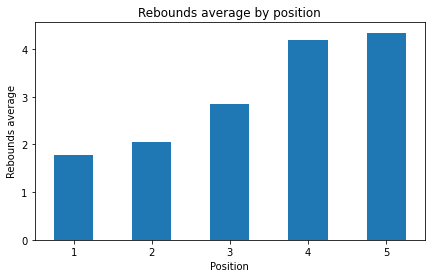

In [97]:
ax1 = hof_improve.groupby('position').mean()['REB']
ax1 = ax1.plot.bar(figsize=(7,4), rot=0)
ax1.set(xlabel='Position', ylabel='Rebounds average')
plt.title('Rebounds average by position')

Text(0.5, 1.0, 'Blocks average by position')

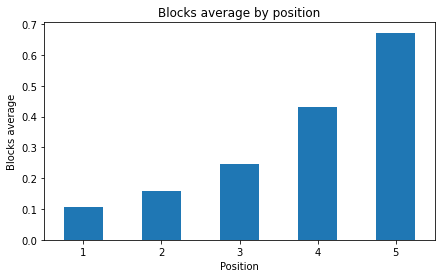

In [98]:
ax2 = hof_improve.groupby('position').mean()['BLK']
ax2 = ax2.plot.bar(figsize=(7,4), rot=0)
ax2.set(xlabel='Position', ylabel='Blocks average')
plt.title('Blocks average by position')

Text(0.5, 1.0, 'Steals average by position')

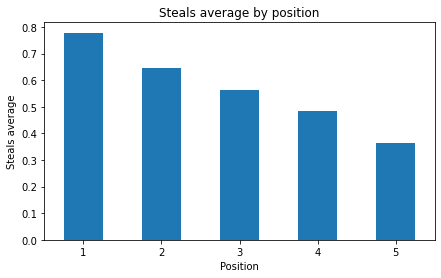

In [99]:
ax3 = hof_improve.groupby('position').mean()['STL']
ax3 = ax3.plot.bar(figsize=(7,4), rot=0)
ax3.set(xlabel='Position', ylabel='Steals average')
plt.title('Steals average by position')

Text(0.5, 1.0, 'Turnovers average by position')

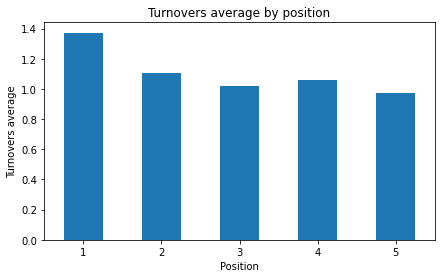

In [100]:
ax4 = hof_improve.groupby('position').mean()['TO']
ax4 = ax4.plot.bar(figsize=(7,4), rot=0)
ax4.set(xlabel='Position', ylabel='Turnovers average')
plt.title('Turnovers average by position')

Text(0.5, 1.0, '3P percentage average by position')

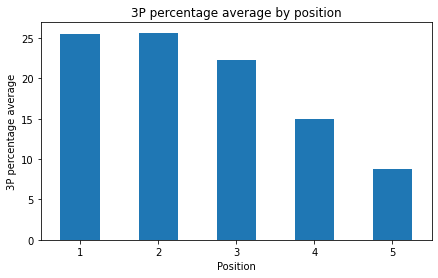

In [101]:
ax5 = hof_improve.groupby('position').mean()['3P']
ax5 = ax5.plot.bar(figsize=(7,4), rot=0)
ax5.set(xlabel='Position', ylabel='3P percentage average')
plt.title('3P percentage average by position')

#### According to the graphs we can see the differance by position , therefore 'e decided in contrast to the previous version:
* Save 291 sampels and full there rebounds values by the average of there position
*Only at 1973 started to count BLK ,STL and TO.
Therefore we need to Full the missing valus of TO,STL,BLK,3P with the average of there position

In [102]:

conditions = [
    (hof_improve['position'] == 1) & (hof_improve['REB'].isna()==True),
    (hof_improve['position'] == 2) & (hof_improve['REB'].isna()==True),
    (hof_improve['position'] == 3) & (hof_improve['REB'].isna()==True),
    (hof_improve['position'] == 4) & (hof_improve['REB'].isna()==True),
    (hof_improve['position'] == 5) & (hof_improve['REB'].isna()==True)]
choices = [REB_1, REB_2, REB_3,REB_4,REB_5]
hof_improve['REB'] = np.select(conditions, choices,default=hof_improve['REB'])

conditions = [
    (hof_improve['position'] == 1) & (hof_improve['STL'].isna()==True),
    (hof_improve['position'] == 2) & (hof_improve['STL'].isna()==True),
    (hof_improve['position'] == 3) & (hof_improve['STL'].isna()==True),
    (hof_improve['position'] == 4) & (hof_improve['STL'].isna()==True),
    (hof_improve['position'] == 5) & (hof_improve['STL'].isna()==True)]
choices = [STL_1, STL_2, STL_3,STL_4,STL_5]
hof_improve['STL'] = np.select(conditions, choices,default=hof_improve['STL'])

conditions = [
    (hof_improve['position'] == 1) & (hof_improve['BLK'].isna()==True),
    (hof_improve['position'] == 2) & (hof_improve['BLK'].isna()==True),
    (hof_improve['position'] == 3) & (hof_improve['BLK'].isna()==True),
    (hof_improve['position'] == 4) & (hof_improve['BLK'].isna()==True),
    (hof_improve['position'] == 5) & (hof_improve['BLK'].isna()==True)]
choices = [BLK_1, BLK_2, BLK_3,BLK_4,BLK_5]
hof_improve['BLK'] = np.select(conditions, choices,default=hof_improve['BLK'])

conditions = [
    (hof_improve['position'] == 1) & (hof_improve['TO'].isna()==True),
    (hof_improve['position'] == 2) & (hof_improve['TO'].isna()==True),
    (hof_improve['position'] == 3) & (hof_improve['TO'].isna()==True),
    (hof_improve['position'] == 4) & (hof_improve['TO'].isna()==True),
    (hof_improve['position'] == 5) & (hof_improve['TO'].isna()==True)]
choices = [TO_1, TO_2, TO_3,TO_4,TO_5]
hof_improve['TO'] = np.select(conditions, choices,default=hof_improve['TO'])

conditions = [
    (hof_improve['position'] == 1) & (hof_improve['3P'].isna()==True),
    (hof_improve['position'] == 2) & (hof_improve['3P'].isna()==True),
    (hof_improve['position'] == 3) & (hof_improve['3P'].isna()==True),
    (hof_improve['position'] == 4) & (hof_improve['3P'].isna()==True),
    (hof_improve['position'] == 5) & (hof_improve['3P'].isna()==True)]
choices = [P3_1, P3_2, P3_3,P3_4,P3_5]
hof_improve['3P'] = np.select(conditions, choices,default=hof_improve['3P'])


In [103]:
hof_improve['MIN']=hof_improve.fillna(hof_improve['MIN'].mean())


In [104]:
hof_improve

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,HOF,position
0,Alaa Abdelnaby,256,53,Alaa Abdelnaby,50.2,0.000000,70.1,3.3,0.3,0.300000,...,0,0,0,0,5,3,1,0,0,4
1,Zaid Abdul-Aziz,505,0,Zaid Abdul-Aziz,42.8,14.938125,72.8,8.0,1.2,0.600000,...,0,0,0,0,10,3,0,0,0,4
2,Kareem Abdul-Jabbar,1560,625,Kareem Abdul-Jabbar,55.9,5.600000,72.1,11.2,3.6,0.900000,...,5,0,5,6,20,18,10,6,1,5
3,Mahmoud Abdul-Rauf,586,336,Mahmoud Abdul-Rauf,44.2,35.400000,90.5,1.9,3.5,0.800000,...,0,0,0,0,9,2,0,0,0,1
4,Tariq Abdul-Wahad,236,145,Tariq Abdul-Wahad,41.7,23.700000,70.3,3.3,1.1,0.800000,...,0,0,0,0,6,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,Wang Zhizhi,137,1,Wang Zhizhi,41.7,38.500000,73.5,1.7,0.3,0.200000,...,0,0,0,0,5,3,0,0,0,5
3521,Jiri Zidek,135,23,Jiri Zidek,40.8,25.000000,78.3,2.1,0.2,0.100000,...,0,0,0,0,3,0,0,0,0,5
3522,Derrick Zimmerman,2,0,Derrick Zimmerman,66.7,0.000000,0.0,2.0,3.5,0.000000,...,0,0,0,0,1,0,0,0,0,1
3523,Jim Zoet,7,0,Jim Zoet,20.0,0.000000,0.0,1.1,0.1,0.100000,...,0,0,0,0,1,0,0,0,0,5


In [105]:
hof_improve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PLAYER_NAME  3525 non-null   object 
 1   GP           3525 non-null   int64  
 2   GS           3525 non-null   int64  
 3   MIN          3525 non-null   object 
 4   FG           3525 non-null   float64
 5   3P           3525 non-null   float64
 6   FT           3525 non-null   float64
 7   REB          3525 non-null   float64
 8   AST          3525 non-null   float64
 9   STL          3525 non-null   float64
 10  TO           3525 non-null   float64
 11  BLK          3525 non-null   float64
 12  PF           3525 non-null   float64
 13  PTS          3525 non-null   float64
 14  EFF          3525 non-null   float64
 15  ASG          3525 non-null   int32  
 16  POM          3525 non-null   int32  
 17  T1           3525 non-null   int32  
 18  T2           3525 non-null   int32  
 19  T3    

#### Complete the cleaning data processing with the new values

## <U> Part 3: Familiarity with the dataset
    
Our hypothesis is that players in hall of fame players have better data than players who are not in the Hall of Fame 
    

In [106]:
hof_improve.sample(5)

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,HOF,position
1271,Bernie Harris,11,0,Bernie Harris,18.2,14.938125,50.0,0.7,0.1,0.0,...,0,0,0,0,1,0,0,0,0,4
1782,Jim Lampley,1,0,Jim Lampley,33.3,0.000000,50.0,5.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,5
2710,Bob Rule,403,0,Bob Rule,46.1,14.938125,68.6,8.3,1.5,0.4,...,0,0,0,0,8,0,0,0,0,4
169,Drew Barry,60,0,Drew Barry,41.7,38.100000,77.4,1.1,1.9,0.3,...,0,0,0,0,3,1,0,0,0,1
182,Shane Battier,977,705,Shane Battier,43.7,38.400000,74.3,4.2,1.8,1.0,...,0,0,0,2,13,10,3,2,0,3


In [107]:
hof_improve.describe(include='all')

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,HOF,position
count,3525,3525.000000,3525.000000,3525,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,...,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000
unique,3440,NaN,NaN,3440,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Charles Smith,NaN,NaN,Charles Smith,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,296.914043,96.944965,NaN,40.100454,19.840749,66.796738,2.997071,1.433163,0.572130,...,0.087660,0.028652,0.059291,0.065248,5.287376,2.516028,0.438014,0.219858,0.039149,2.949504
std,NaN,324.545086,208.704532,NaN,10.906432,13.789320,18.758457,2.232558,1.352397,0.349454,...,0.502523,0.238294,0.540265,0.421133,4.598706,3.307386,1.076752,0.750446,0.193977,1.361983
min,NaN,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,37.000000,0.000000,NaN,35.400000,8.834545,61.800000,1.400000,0.500000,0.365625,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,NaN,143.000000,0.000000,NaN,41.900000,22.243707,70.800000,2.400000,1.000000,0.562956,...,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,3.000000
75%,NaN,513.000000,70.000000,NaN,46.300000,27.000000,77.600000,4.000000,2.000000,0.700000,...,0.000000,0.000000,0.000000,0.000000,9.000000,4.000000,0.000000,0.000000,0.000000,4.000000


##### Let's look on some differnce between Hall of fame members and not

Text(0.5, 1.0, 'Data separate by Hall of fame memebership or not')

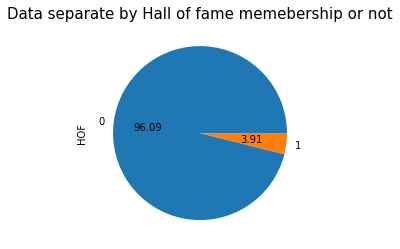

In [108]:
hof_improve["HOF"].value_counts().plot(kind = "pie", autopct = "%.2f" )
plt.title('Data separate by Hall of fame memebership or not',fontsize=15)

##### According to the pie we can see that the HOF players only 4.35% from all NBA players
We will see in the next graphs the uniqueness of the HOF players

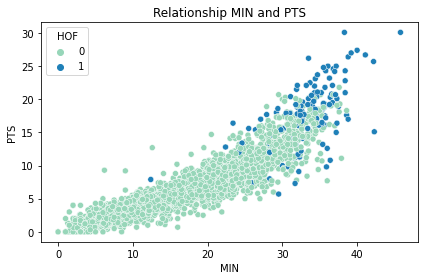

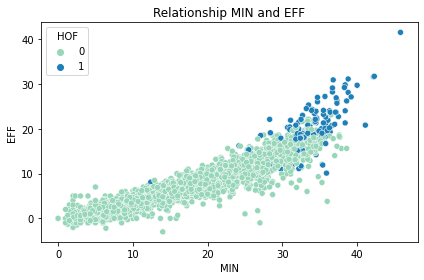

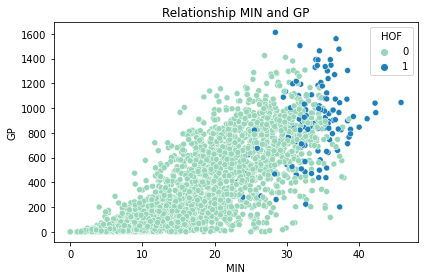

In [109]:
fig, ax = plt.subplots()
sns.scatterplot(x = hof.MIN, y = hof.PTS, hue = hof['HOF'], palette = 'YlGnBu')
ax.yaxis.label.set_color("black")
ax.xaxis.label.set_color("black")
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black');
plt.title('Relationship MIN and PTS')

plt.tight_layout()
plt.show()

fig, ax2 = plt.subplots()
sns.scatterplot(x = hof.MIN, y = hof.EFF, hue = hof['HOF'], palette = 'YlGnBu')
ax2.yaxis.label.set_color("black")
ax2.xaxis.label.set_color("black")
ax2.tick_params(axis='x', colors='black')
ax2.tick_params(axis='y', colors='black');
plt.title('Relationship MIN and EFF')

plt.tight_layout()
plt.show()

fig, ax3 = plt.subplots()
sns.scatterplot(x = hof.MIN, y = hof.GP, hue = hof['HOF'], palette = 'YlGnBu')
ax3.yaxis.label.set_color("black")
ax3.xaxis.label.set_color("black")
ax3.tick_params(axis='x', colors='black')
ax3.tick_params(axis='y', colors='black');
plt.title('Relationship MIN and GP')

plt.tight_layout()
plt.show()

[Text(0.5, 0, 'Hall of fame'), Text(0, 0.5, 'All star games average')]

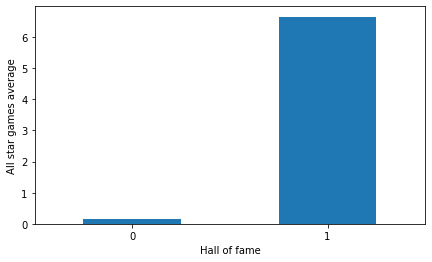

In [110]:
labels = ["Hall of fame", "Not hall of fame"]
ax2 = hof_improve.groupby('HOF').mean()['ASG']
ax2 = ax2.plot.bar(figsize=(7,4), rot=0)
ax2.set(xlabel='Hall of fame', ylabel='All star games average')


##### As we can see our hypothesis is correct
The HOF players played more minutes for more seasons were more effective and selected for more all star games

## <U> Part 4: Correlations and make new features

##### Correlations HOF 

In [111]:
hof_improve = hof_improve.set_index('PLAYER_NAME')

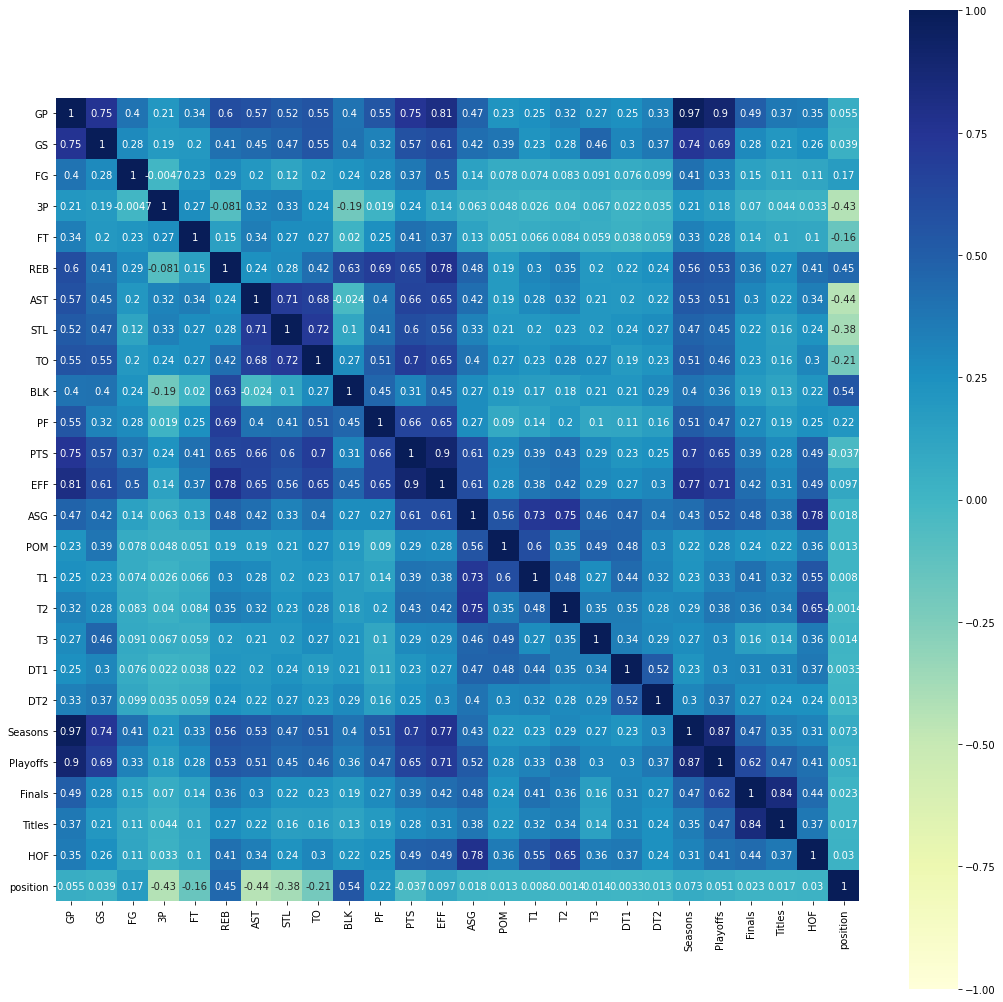

In [112]:
correlation_features = hof_improve.columns  


nba_corr = hof_improve[correlation_features].corr()
plt.subplots(figsize=(18,18))

corr = nba_corr
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

sns.heatmap(corr, 
    annot=True, 
    annot_kws={"fontsize":10},
    xticklabels = nba_corr.columns.values, 
    yticklabels = nba_corr.columns.values, 
    vmin = -1, 
    vmax = 1, 
    center = 0, 
    cmap = "YlGnBu", 
    square = True) 
plt.show();

### <U>Conclusions 

* High correlations between MIN & PTS & EFF
* Low correlations between 3P & HOF
* High correlations between Playoffs & Seasons & GP & GS
* High correlations between Finals & Titles
* High correlations between ASG & HOF
* High correlations between Teams & HOF   

### <U> Decisions
    
* Remove MIN
* Remove 3P    
* Remove PTS
* Remove GP
* Remove GS       
* Remove Seasons
* Remove Titles
* Make new features that will include T1,T2,T3 together
* Make new features that will include DT1,DT2 together 

In [2416]:
hof_improve.drop(['MIN','3P','PTS','Seasons','Titles','GP','GS'], axis=1, inplace=True)

##### Make the new features
 

In [2417]:
hof_improve["T_sum"] = hof_improve["T1"] * 1.4 + hof_improve["T2"] * 1.2 + hof_improve["T3"]
hof_improve["DT_sum"] = hof_improve["DT1"] * 1.2 + hof_improve["DT2"]


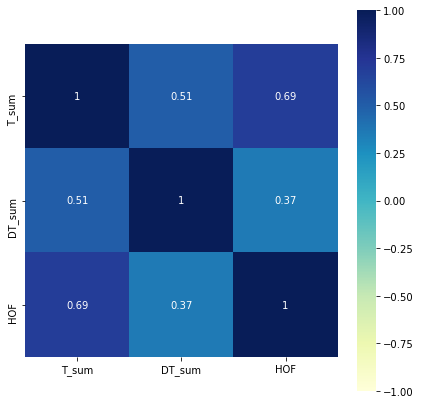

In [2418]:
correlation_features = [ 'T_sum','DT_sum','HOF']


nba_corr = hof_improve[correlation_features].corr()
plt.subplots(figsize=(7,7))

corr = nba_corr
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

sns.heatmap(corr, annot=True, annot_kws={"fontsize":10},xticklabels = nba_corr.columns.values, 
                   yticklabels = nba_corr.columns.values, vmin = -1,vmax = 1, center = 0,cmap="YlGnBu",square = True) 
plt.show();

##### We can see that T_sum and DT_sum are correlate better than T1,T2,T3,DT1,DT2 

##### After we made new features that corrlation better with HOF we will remove the features that we used 

In [2419]:
hof_improve.drop(['T1','T2','T3','DT1','DT2'], axis=1, inplace=True)

In [2420]:
hof_improve = hof_improve.reset_index()

In [2421]:
hof_improve

,PLAYER_NAME,FG,FT,REB,AST,STL,TO,BLK,PF,EFF,ASG,POM,Playoffs,Finals,HOF,position,T_sum,DT_sum
0,Alaa Abdelnaby,50.2,70.1,3.3,0.3,0.300000,1.000000,0.300000,1.9,6.2,0,0,3,1,0,4,0.0,0.0
1,Zaid Abdul-Aziz,42.8,72.8,8.0,1.2,0.600000,0.900000,1.000000,2.2,13.5,0,0,3,0,0,4,0.0,0.0
2,Kareem Abdul-Jabbar,55.9,72.1,11.2,3.6,0.900000,2.700000,2.600000,3.0,30.9,19,2,18,10,1,5,20.0,12.0
3,Mahmoud Abdul-Rauf,44.2,90.5,1.9,3.5,0.800000,1.600000,0.100000,1.9,11.5,0,0,2,0,0,1,0.0,0.0
4,Tariq Abdul-Wahad,41.7,70.3,3.3,1.1,0.800000,1.300000,0.400000,2.1,7.1,0,0,2,0,0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,Wang Zhizhi,41.7,73.5,1.7,0.3,0.200000,0.500000,0.300000,1.1,3.9,0,0,3,0,0,5,0.0,0.0
3521,Jiri Zidek,40.8,78.3,2.1,0.2,0.100000,0.500000,0.100000,1.8,3.4,0,0,0,0,0,5,0.0,0.0
3522,Derrick Zimmerman,66.7,0.0,2.0,3.5,0.000000,2.000000,0.000000,2.0,5.0,0,0,0,0,0,1,0.0,0.0
3523,Jim Zoet,20.0,0.0,1.1,0.1,0.100000,0.600000,0.400000,1.3,1.0,0,0,0,0,0,5,0.0,0.0


# ----------------------------------------------------------------------------------

## Prepare for a surprise at the end

In [2422]:
players_name = active_players['PLAYER_NAME']
active_players = active_players.drop(['PLAYER_NAME'] , axis=1)
active_players["T_sum"] = active_players["T1"] * 1.4 + active_players["T2"] * 1.2 + active_players["T3"]
active_players["DT_sum"] = active_players["DT1"] * 1.2 + active_players["DT2"]
active_players = active_players[['AST', 'REB','FT', 'PF','EFF', 'ASG', 'POM','T_sum','DT_sum', 'Playoffs','Finals']]

# ----------------------------------------------------------------------------------

## <U>Part 5:Select metrics scoring

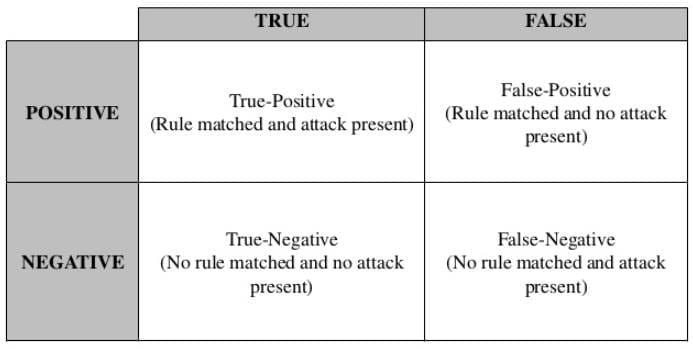

Because our data is unbalance we will choose the metrics:Recall & Precision & F1 to our models

* **Recall** (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.
    
Recall = TP/(TP+FN)
    
* **Precision** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
    
Precision = TP/(TP+FP)

* **F1 score** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)



#### Because we have inbalance data we choose the scoring metric F1. We will use Recall & Precision to get wide perspective

## <U> Part 6: Train-Test-Split & Scaling 

##### Train test split

In [2423]:
X = hof_improve[['AST', 'REB','FT', 'PF','EFF', 'ASG', 'POM','T_sum','DT_sum', 'Playoffs','Finals']] 
y = hof_improve['HOF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [2424]:
len(X_train) , len(y_train) , len(X_test) , len(y_test)

(2643, 2643, 882, 882)

##### Scaling
Scale the data with MinMaxScaler method

In [2425]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_copy = pd.DataFrame(scaler.transform(X_train),  columns = X_train.columns)
X_test_copy = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

# Semster B Improvement


### t-SNE

It allows visualisation of the underlying local structure of high dimensional data in 2 or 3 dimensions, allowing the results to be plotted in a simple scatter plot.

In [2451]:
tsne = TSNE(n_components=2, init='pca', random_state=10)
X_tsne = tsne.fit_transform(X)

[Text(0.5, 1.0, 'Hall Of Fame data T-SNE projection')]

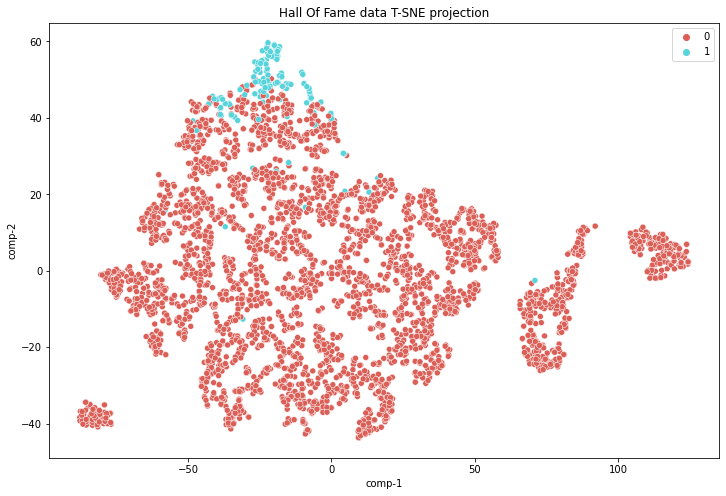

In [2452]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_tsne[:,0]
df["comp-2"] = X_tsne[:,1]
fig = plt.gcf()

fig.set_size_inches(12, 8)
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Hall Of Fame data T-SNE projection") 

The result of t-SNE separates classes very well. This implies that it is possible to build classification model that will also separate classes very well

## <U> Part 7: Models

### Dummy model

In [2426]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_copy, y_train)

DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X_test_copy)
dummy_clf.score(X_test_copy, y_test)


0.95578231292517

#### Confusion matrix for dummy model

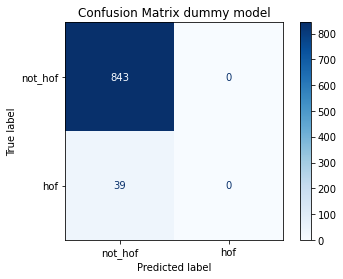

In [2427]:
plot_confusion_matrix(dummy_clf ,X_test_copy , y_test, display_labels=["not_hof", "hof"], cmap =  plt.cm.Blues )
plt.title("Confusion Matrix dummy model")
plt.show()

We got 95.5% that is very high because our data is inbalance, but the model not really do the task and just said every one is HOF

We can also tell the model said every one is not HOF and we will get just 4%.

### KNN

In [2428]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

k_range = list(range(1,31,2))

scores_f1 = []
scores_recall = []
scores_precision = []

k_mean_score_f1 = []
k_mean_score_recall = []
k_mean_score_precision = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores_f1 = cross_val_score(knn, X_train_copy, y_train, cv=kf, scoring= 'f1')
    scores_recall = cross_val_score(knn, X_train_copy, y_train, cv=kf, scoring= 'recall')
    scores_precision = cross_val_score(knn, X_train_copy, y_train, cv=kf, scoring= 'precision')
    
    k_mean_score_f1.append(scores_f1.mean())
    k_mean_score_recall.append(scores_recall.mean())
    k_mean_score_precision.append(scores_precision.mean())

d = {'k_mean_f1': k_mean_score_f1 , 'k_mean_recall' : k_mean_score_recall , 'k_mean_precision' : k_mean_score_precision}
Ks = pd.DataFrame(data = d, index=k_range)

In [2429]:
Ks

,k_mean_f1,k_mean_recall,k_mean_precision
1,0.692740,0.657746,0.742381
3,0.810013,0.744174,0.903931
5,0.775031,0.680835,0.946270
7,0.774045,0.667776,0.965833
9,0.788752,0.677819,0.965171
11,0.766838,0.648698,0.971465
13,0.761838,0.641079,0.969798
15,0.791300,0.670127,0.979798
17,0.732407,0.598228,0.990000
19,0.723855,0.594980,0.970000


In [2430]:
Ks[Ks['k_mean_f1']==max(Ks['k_mean_f1'])]

,k_mean_f1,k_mean_recall,k_mean_precision
3,0.810013,0.744174,0.903931


### The best k for F1 metric is: 3

##### Gread search for hyperparameter

In [2431]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
k_range = list(range(1,31,2))
weights = ['uniform', 'distance']
metrics_options = ['euclidean', 'manhattan']
param_grid = dict(n_neighbors = k_range , weights=weights,metric=metrics_options)
grid = GridSearchCV(knn , param_grid , cv = kf , scoring= 'f1')
grid.fit(X_train_copy , y_train)
gs = pd.DataFrame(grid.cv_results_)[['mean_test_score' ,  'params' ]].set_index('params')
gs

,mean_test_score
params,
"{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}",0.692740
"{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}",0.692740
"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",0.810013
"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}",0.810013
"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}",0.775031
"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}",0.775031
"{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}",0.774045
"{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}",0.774045
"{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}",0.788752


In [2432]:
print(grid.best_score_)
print(grid.best_params_)

0.8100129870129871
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


#### As we can see our best K is 3 with 0.81% success.


##### We try to find the best hyperparameters by grid search, as we see nothing change. So Default KNN params are the best for us.

# Decision Tree

In [2433]:
DecisionTree = DecisionTreeClassifier()

scores_f1 = cross_val_score(DecisionTree, X_train_copy, y_train, cv=4, scoring= 'f1')
scores_recall = cross_val_score(DecisionTree, X_train_copy, y_train, cv=4, scoring= 'recall')
scores_precision = cross_val_score(DecisionTree, X_train_copy, y_train, cv=4, scoring='precision')

print("The f1_score of Decision Tree is:" + str(scores_f1.mean()))
print("The recall_score of Decision Tree is:" + str(scores_recall.mean()))
print("The precision_score of Decision Tree is:" + str(scores_precision.mean()))

The f1_score of Decision Tree is:0.7385161422428503
The recall_score of Decision Tree is:0.6866666666666666
The precision_score of Decision Tree is:0.722746581254827


#### As we can see F1 gives score of 0.73% success.

# Random Forest

In [2449]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

forest = RandomForestClassifier(n_estimators=100 , n_jobs = -1, random_state =42, 
                                  max_depth=50)

scores_f1 = cross_val_score(forest, X_train_copy, y_train, cv=kf, scoring= 'f1')
scores_recall = cross_val_score(forest, X_train_copy, y_train, cv=kf, scoring= 'recall')
scores_precision = cross_val_score(forest, X_train_copy, y_train, cv=kf, scoring='precision')

print("The f1_score of Random forest is:" + str(scores_f1.mean()))
print("The recall_score of Random forest is:" + str(scores_recall.mean()))
print("The precision_score of Random forest is:" + str(scores_precision.mean()))

The f1_score of Random forest is:0.7933352700938908
The recall_score of Random forest is:0.7697668997668997
The precision_score of Random forest is:0.8434848484848485


#### As we can see F1 gives score of 0.79% success.

# Semester B New Models

### XGBoost

In [2435]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

xgb = XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')

scores_f1 = cross_val_score(xgb, X_train_copy, y_train, cv=kf, scoring= 'f1')
scores_recall = cross_val_score(xgb, X_train_copy, y_train, cv=kf, scoring= 'recall')
scores_precision = cross_val_score(xgb, X_train_copy, y_train, cv=kf, scoring='precision')

print("The f1_score of Random forest is:" + str(scores_f1.mean()))
print("The recall_score of Random forest is:" + str(scores_recall.mean()))
print("The precision_score of Random forest is:" + str(scores_precision.mean()))

The f1_score of Random forest is:0.7847332667332667
The recall_score of Random forest is:0.7458419358419357
The precision_score of Random forest is:0.8342485292485293


#### As we can see F1 gives score of 0.78% success.

### ADABoost

In [2436]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=300)

scores_f1 = cross_val_score(ada, X_train_copy, y_train, cv=kf, scoring= 'f1')
scores_recall = cross_val_score(ada, X_train_copy, y_train, cv=kf, scoring= 'recall')
scores_precision = cross_val_score(ada, X_train_copy, y_train, cv=kf, scoring='precision')

print("The f1_score of Random forest is:" + str(scores_f1.mean()))
print("The recall_score of Random forest is:" + str(scores_recall.mean()))
print("The precision_score of Random forest is:" + str(scores_precision.mean()))

The f1_score of Random forest is:0.7720903540903541
The recall_score of Random forest is:0.7204440004440005
The precision_score of Random forest is:0.8755555555555554


#### As we can see F1 gives score of 0.77% success.

### Voting Classifier

In [2437]:
estimators=[('LR', LogisticRegression()),('RF',RandomForestClassifier()),('DT', DecisionTreeClassifier()),('ADA',AdaBoostClassifier())]


### Hard Voting

In [2438]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
vot_hard = VotingClassifier(estimators = estimators, voting ='hard')

scores_f1 = cross_val_score(vot_hard, X_train_copy, y_train, cv=kf, scoring= 'f1')
scores_recall = cross_val_score(vot_hard, X_train_copy, y_train, cv=kf, scoring= 'recall')
scores_precision = cross_val_score(vot_hard, X_train_copy, y_train, cv=kf, scoring='precision')

print("The f1_score of Random forest is:" + str(scores_f1.mean()))
print("The recall_score of Random forest is:" + str(scores_recall.mean()))
print("The precision_score of Random forest is:" + str(scores_precision.mean()))

The f1_score of Random forest is:0.7778341266576562
The recall_score of Random forest is:0.696921966921967
The precision_score of Random forest is:0.9203571428571429


#### As we can see F1 gives score of 0.77% success.

### Soft Voting

In [2439]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
vot_soft = VotingClassifier(estimators = estimators, voting ='soft')

scores_f1 = cross_val_score(vot_soft, X_train_copy, y_train, cv=kf, scoring= 'f1')
scores_recall = cross_val_score(vot_soft, X_train_copy, y_train, cv=kf, scoring= 'recall')
scores_precision = cross_val_score(vot_soft, X_train_copy, y_train, cv=kf, scoring='precision')

print("The f1_score of Random forest is:" + str(scores_f1.mean()))
print("The recall_score of Random forest is:" + str(scores_recall.mean()))
print("The precision_score of Random forest is:" + str(scores_precision.mean()))

The f1_score of Random forest is:0.7530596981875755
The recall_score of Random forest is:0.6662509712509712
The precision_score of Random forest is:0.8088852813852814


#### As we can see F1 gives score of 0.75% success.

### Our new models got lower scores than KNN


## <U> Part 8: Choose the best model and final test

Our best model is KNN  

### KNN -with the best hyperparamters( K = 3 , other = default)

In [2443]:
knn_final_model = KNeighborsClassifier(n_neighbors=3)
knn_final_model.fit(X_train_copy , y_train)
knn_final_predict = knn_final_model.predict(X_test_copy)
print("The f1_score of KNN final model is: " + str(metrics.f1_score(y_test , knn_final_predict)))

The f1_score of KNN final model is: 0.7647058823529411


#### Confusion matrix for final model

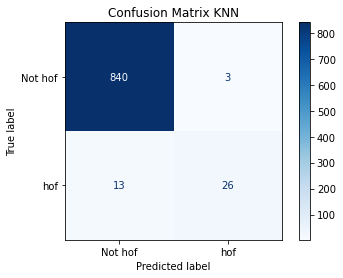

In [2444]:
plot_confusion_matrix(knn_final_model ,X_test_copy , y_test, display_labels=["Not hof", "hof"], cmap =  plt.cm.Blues )
plt.title("Confusion Matrix KNN")
plt.show()

# The best model score of the test is: 0.76%

### We got 3% more than the previous version!


# -------------------------------------------------------------------------

# Surprise - Who will be at HOF at future ?

In [2445]:
knn_final_predict_active = knn_final_model.predict(active_players)
data = {'PLAYER_NAME' : players_name , 'HOF' : knn_final_predict_active }
active = pd.DataFrame(data)
active_to_hof = active[active['HOF']==1]
active_to_hof = active_to_hof.reset_index()
del active_to_hof['index']


In [2446]:
for i in range(len(active_to_hof)):
    print(active_to_hof.loc[i,"PLAYER_NAME"], "will be HOF")

Steven Adams will be HOF
Bam Adebayo will be HOF
Josh Akognon will be HOF
LaMarcus Aldridge will be HOF
Kyle Alexander will be HOF
Jarrett Allen will be HOF
Giannis Antetokounmpo will be HOF
Carmelo Anthony will be HOF
Trevor Ariza will be HOF
Deandre Ayton will be HOF
Chris Babb will be HOF
LaMelo Ball will be HOF
Lonzo Ball will be HOF
Scottie Barnes will be HOF
Nicolas Batum will be HOF
Bradley Beal will be HOF
Jerrelle Benimon will be HOF
Dairis Bertans will be HOF
Patrick Beverley will be HOF
Eric Bledsoe will be HOF
Jordan Bone will be HOF
Devin Booker will be HOF
Malcolm Brogdon will be HOF
Jaylen Brown will be HOF
Shaq Buchanan will be HOF
Jimmy Butler will be HOF
Clint Capela will be HOF
Michael Carter-Williams will be HOF
Troy Caupain will be HOF
Mario Chalmers will be HOF
Tyson Chandler will be HOF
Zylan Cheatham will be HOF
John Collins will be HOF
Darren Collison will be HOF
Mike Conley will be HOF
Matt Costello will be HOF
DeMarcus Cousins will be HOF
Jamal Crawford will 

In [2447]:
len(active_to_hof)

184

# * The data is correct for 2022
For young players, the data is misleading because they can achieve awards in the next few years

# Thanks for reading!